In [1]:
import seaborn as sb
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [2]:
path = '../names/data'
%matplotlib inline

## Task 1

In [3]:
files = [f for f in listdir(path) if isfile(join(path, f))]
li = []
for file in files:
    df = pd.read_csv(f'../names/data/{file}', names=['Name', 'Gender', 'Count'])
    df['Year'] = int(file[3:7])
    # df.set_index('Year', inplace = True)
    li.append(df)
df = pd.concat(li)
df.head()

,Name,Gender,Count,Year
0,Mary,F,54373,1936
1,Shirley,F,35162,1936
2,Barbara,F,31683,1936
3,Betty,F,25869,1936
4,Patricia,F,23916,1936


In [ ]:
df.plot.bar()
#df.plot.bar(x="Year", y="Count")
#df.plot.scatter(x='Year', y='Count', s=0.5, figsize=(15, 8))

## Task 2

In [5]:
df['Last Letter'] = (df['Name'].str[-1])
df.head()

,Name,Gender,Count,Year,Last Letter
0,Mary,F,54373,1936,y
1,Shirley,F,35162,1936,y
2,Barbara,F,31683,1936,a
3,Betty,F,25869,1936,y
4,Patricia,F,23916,1936,a


## Task 3

In [ ]:
#sb.countplot(x='Last Letter', data=df, order=["a", "b", "c"])

## Task 4

In [7]:
q_year_count = df.loc[df['Last Letter'] == 'q'][['Year', 'Last Letter']].groupby(['Year']).size()

/home/hee3be/Dev/data-science/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


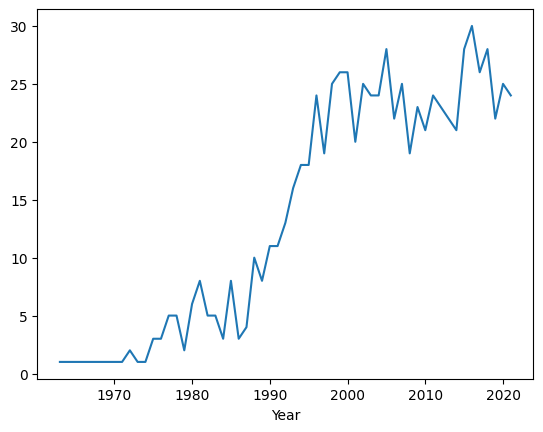

In [8]:
#sb.countplot(x='Year', data=task4)
figure1 = sb.lineplot(x=q_year_count.index, y=q_year_count.values)


## Task 5

In [20]:
dd

Last Letter
a    1977.573655
b    1988.910331
c    1981.411832
d    1964.064631
e    1968.269316
f    1981.720457
g    1976.453418
h    1993.538332
i    1996.001219
j    2002.205550
k    1984.515464
l    1971.828783
m    1986.113092
n    1984.694257
o    1971.531937
p    1975.605007
q    2003.997494
r    1978.383744
s    1972.538815
t    1968.035997
u    1987.416026
v    1998.209468
w    1969.553582
x    1988.940727
y    1976.505059
z    1989.064508
Name: Year, dtype: float64

In [32]:
group_letter_year = df.groupby(['Last Letter', 'Year'])['Last Letter'].count()
group_letter_year.head()

Last Letter  Year
a            1880    450
             1881    432
             1882    478
             1883    480
             1884    543
Name: Last Letter, dtype: int64

In [39]:
group_letter_year = group_letter_year.unstack(0)
group_letter_year.head()

Last Letter,a,b
Year,,
1880,450.0,7.0
1881,432.0,6.0
1882,478.0,7.0
1883,480.0,5.0
1884,543.0,10.0
...,...,...
2017,6819.0,121.0
2018,6674.0,114.0
2019,6532.0,114.0


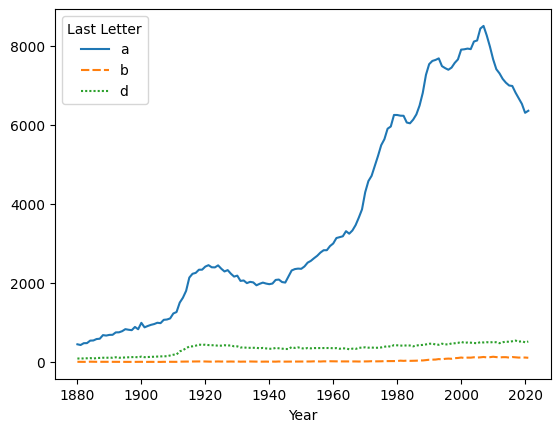

In [52]:
figure2 = sb.lineplot(data=group_letter_year[['a', 'b', 'd']],)

## Task 6

In [50]:
df['First Letter'] = (df['Name'].str[0].str.lower())
df.sort_values(by=['First Letter'], axis=0)
df.head()

,Name,Gender,Count,Year,Last Letter,First Letter
0,Mary,F,54373,1936,y,m
1,Shirley,F,35162,1936,y,s
2,Barbara,F,31683,1936,a,b
3,Betty,F,25869,1936,y,b
4,Patricia,F,23916,1936,a,p


## Task 7

In [56]:
figure2.figure.savefig('figure2.png', dpi=150)
figure1.figure.savefig('figure1.png', dpi=150)

## Task 8

lineplots and for each letter seperate plot just showing two lines, each for girls and boys